In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision as thv
from torchvision import transforms

from efficient_net.network import EfficientNetX as EfficientNet
from efficient_net.dataloader import create_loader
from efficient_net import model as m
from efficient_net.configs.optim_config import TrainConfig as Config

In [2]:
print(torch.cuda.is_available())

True


In [3]:
model = EfficientNet(m.efficient_net_b0)

p = torch.load('../logs/efnet_20200521140909/efficient_net.pt')
model.load_state_dict(p)

model.eval()
device = torch.device('cuda:0')
model = model.to(device)

Sequential(
  (0): ConvBNA(
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (1): MBConvX(
    (conv_ip): ConvBNA(
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (activation): Swish()
    )
    (conv_dw): ConvBNA(
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (activation): Swish()
    )
    (conv_op): ConvBNA(
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (_sqex): SqueezeExcitation(
      (conv_sq): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
      

In [4]:
dataset = os.path.join(os.getcwd(), '../../../datasets/caltech256/256_ObjectCategories/')
assert os.path.isdir(dataset)

(224, 224, 3)


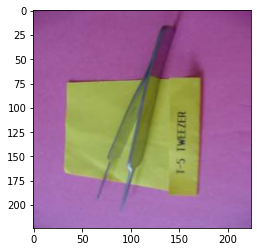

In [5]:
loader1, loader = create_loader(dataset)

transform = transforms.Compose(
            [transforms.CenterCrop(Config.INPUT_SHAPE[1:]),
             transforms.ToTensor()])
# loader.transform = transform

x = next(iter(loader))
im, label = x
im = im.detach().cpu().numpy().transpose((2, 1, 0))
# im = np.array(im)
print(im.shape)

plt.imshow(im)
plt.show()

In [6]:
c = 0
i = 0
for image, label in loader:
    # image = image.detach().cpu().numpy()
    # image = (image - np.min(image)) / 1
    
    # image2 = torch.from_numpy(image).float().to(device)
    im = image.to(device).unsqueeze(0)
    
    p = model(im)
    im2 = image.detach().cpu().numpy().transpose((2, 1, 0))
    # plt.imshow(im2)
    # plt.show()
    
    p = p.detach().cpu().numpy()[0]

    x = p.argsort()[-5:][::-1]
    print()
    if np.argmax(p) == label:
        c += 1
    print([x, p[x], np.argmax(p), label])
    
    i += 1
    if i == 30:
        break

print(f'Correct: {c/ i}')


[array([215,  40,   9,  77,  58]), array([9.907302 , 8.1268835, 7.913138 , 7.4473352, 7.3508697],
      dtype=float32), 215, 233]

[array([256,   7,   3,  73, 165]), array([13.7692585 ,  2.3545475 ,  2.0997112 ,  0.97000265,  0.43307608],
      dtype=float32), 256, 233]

[array([209, 233, 232,  58, 179]), array([11.703608 ,  9.773975 ,  9.3524275,  8.969471 ,  6.895673 ],
      dtype=float32), 209, 233]

[array([124, 233, 209, 256, 198]), array([7.605993 , 7.395214 , 7.234782 , 6.225916 , 4.7928567],
      dtype=float32), 124, 233]

[array([208, 198, 256, 233,  58]), array([11.740632 , 10.132366 ,  9.483549 ,  8.000761 ,  7.8697643],
      dtype=float32), 208, 233]

[array([198, 233, 209, 124, 256]), array([5.559144 , 3.5872016, 3.108522 , 2.96074  , 2.5569758],
      dtype=float32), 198, 233]

[array([232, 233, 199, 256,  57]), array([4.745024 , 4.103812 , 2.4806356, 2.3085234, 2.150378 ],
      dtype=float32), 232, 233]

[array([232, 233, 183,  53,  66]), array([16.225313 , 13.54946